In [1]:
import numpy as np

In [2]:
import pandas as pd

In [8]:
df = pd.read_csv('Ryanair with sentiment + IBM - resource_02_with_sentiment.csv')

In [9]:
def assign(x):
    if x <= -0.4:
        return -1
    elif -0.3 <= x <= 0.3:
        return 0
    elif x >= 0.4:
        return 1

In [10]:
print(df["y_pred_google"])

0      0.0
1     -0.4
2      0.0
3     -0.2
4      0.1
      ... 
408    0.3
409    0.0
410    0.0
411    0.4
412    0.1
Name: y_pred_google, Length: 413, dtype: float64


In [11]:
print(df["y_pred_ibm"])

0      0.000000
1     -0.517232
2      0.000000
3     -0.696197
4      0.000000
         ...   
408    0.000000
409    0.000000
410    0.000000
411    0.965728
412    0.000000
Name: y_pred_ibm, Length: 413, dtype: float64


In [12]:
df["y_pred_ibm"]=df["y_pred_ibm"].round(1)

In [13]:
df["y_pred_google_binary"] = df["y_pred_google"].apply(assign)

In [14]:
df["y_pred_ibm_binary"] = df["y_pred_ibm"].apply(assign)

In [15]:
print(df)

                                                  text  y_pred_google  \
0    ➠Jet2 Boeing 737-8MG\n20mls NW of Havant @ 290...            0.0   
1           @JamieShort1986 @Ryanair 😂😂 fucking sniper           -0.4   
2    ➠Ryanair Boeing 737 MAX 8-200\n11mls NE of Hav...            0.0   
3    Those 20 quid flights come at a price Bruv @Lu...           -0.2   
4    RT @Ryanair: Me: "Let's fly at 6am, we'll have...            0.1   
..                                                 ...            ...   
408                                 @PriscillaD96 Peak            0.3   
409  ➠Private owner Pilatus PC-12 NGX\n9mls SW of H...            0.0   
410  ➠Ryanair Boeing 737-8AS\n3mls SE of Havant @ 3...            0.0   
411  @wizzair That’s perfect news! What about u @Ry...            0.4   
412  RT @Ryanair: Me: "Let's fly at 6am, we'll have...            0.1   

     y_pred_ibm  y_true  y_pred_google_binary  y_pred_ibm_binary  
0           0.0       0                     0           

In [16]:
import seaborn as sns

In [17]:
sns.set(style="darkgrid")

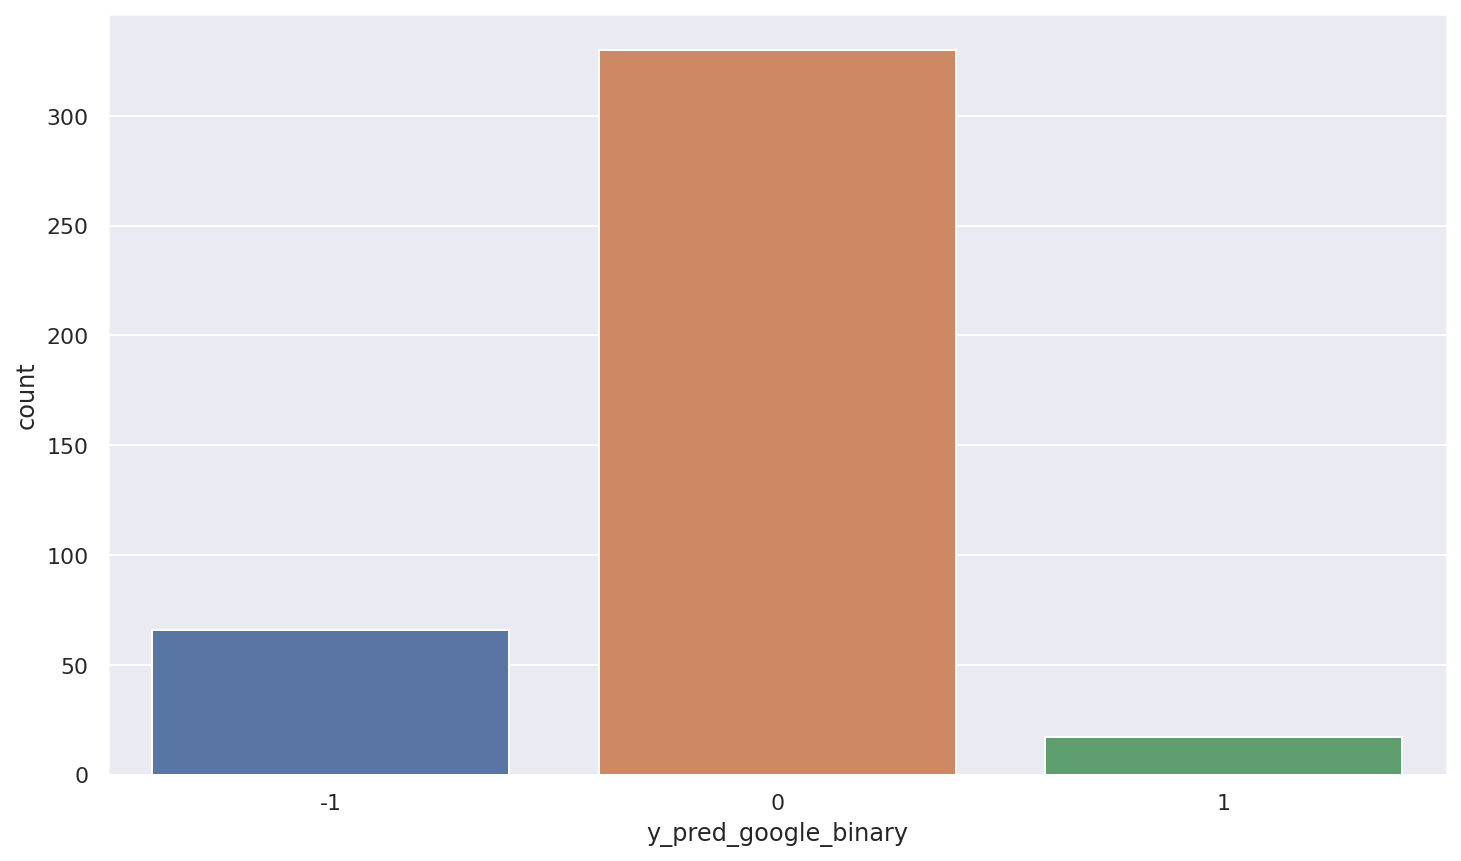

In [18]:
ax = sns.countplot(x=df["y_pred_google_binary"], data=df)

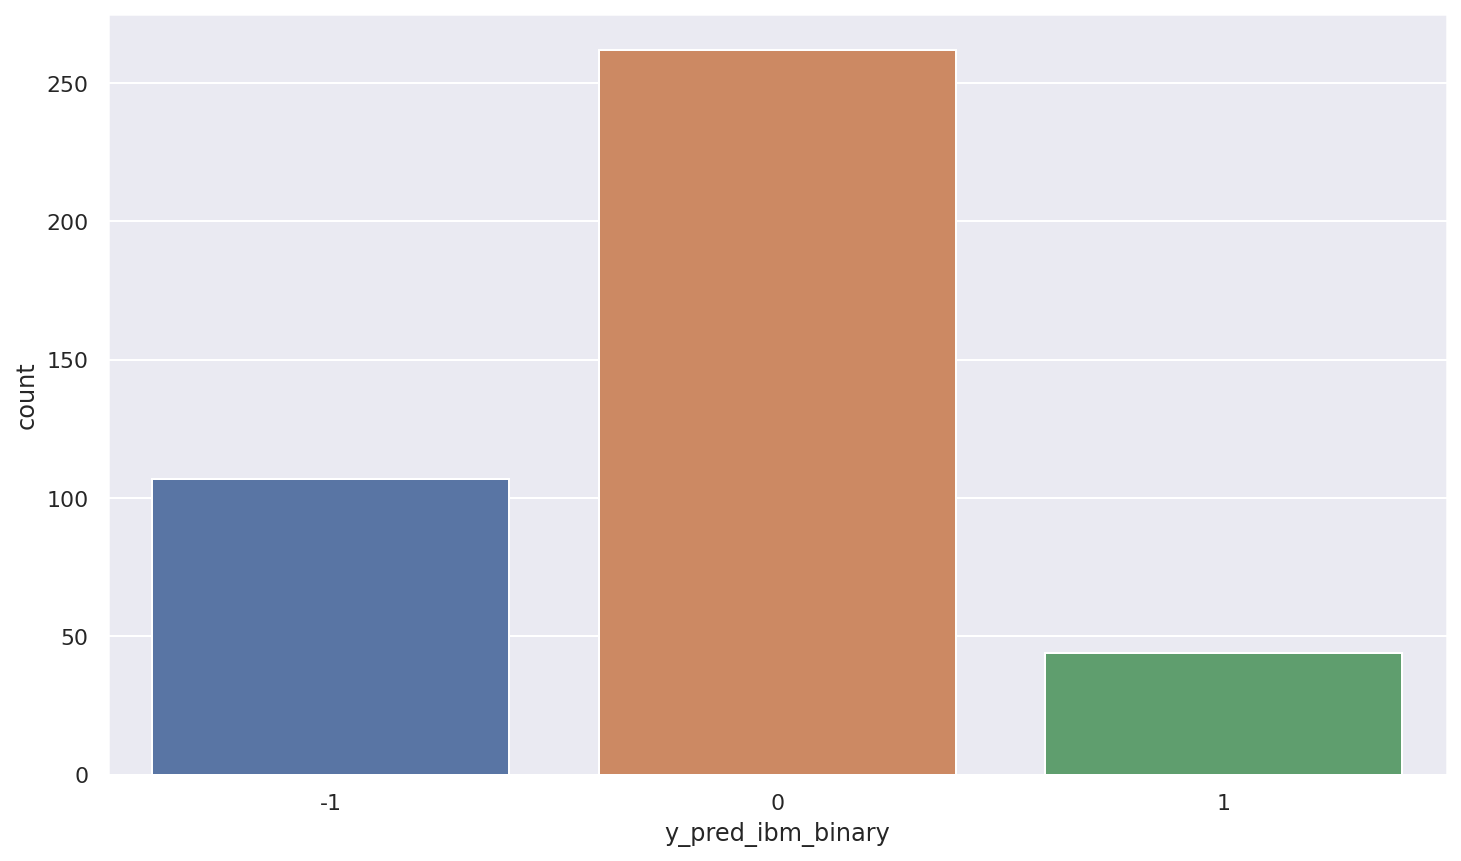

In [19]:
ax = sns.countplot(x=df["y_pred_ibm_binary"], data=df)

In [20]:
df["y_pred_google_binary"].value_counts()

 0    330
-1     66
 1     17
Name: y_pred_google_binary, dtype: int64

In [21]:
df["y_pred_ibm_binary"].value_counts()

 0    262
-1    107
 1     44
Name: y_pred_ibm_binary, dtype: int64

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
# Google

In [24]:
accuracy_score(df["y_true"], df["y_pred_google_binary"])

0.5351089588377724

In [25]:
from sklearn.metrics import recall_score

In [26]:
recall_score(df["y_true"], df["y_pred_google_binary"], average='weighted')

0.5351089588377724

In [27]:
from sklearn.metrics import f1_score

In [28]:
f1_score(df["y_true"], df["y_pred_google_binary"], average='weighted')

0.46454732150979733

In [38]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(df["y_true"], df["y_pred_google_binary"])

array([[ 49,  47,   2],
       [ 16, 162,   5],
       [  1, 121,  10]])

<AxesSubplot: >

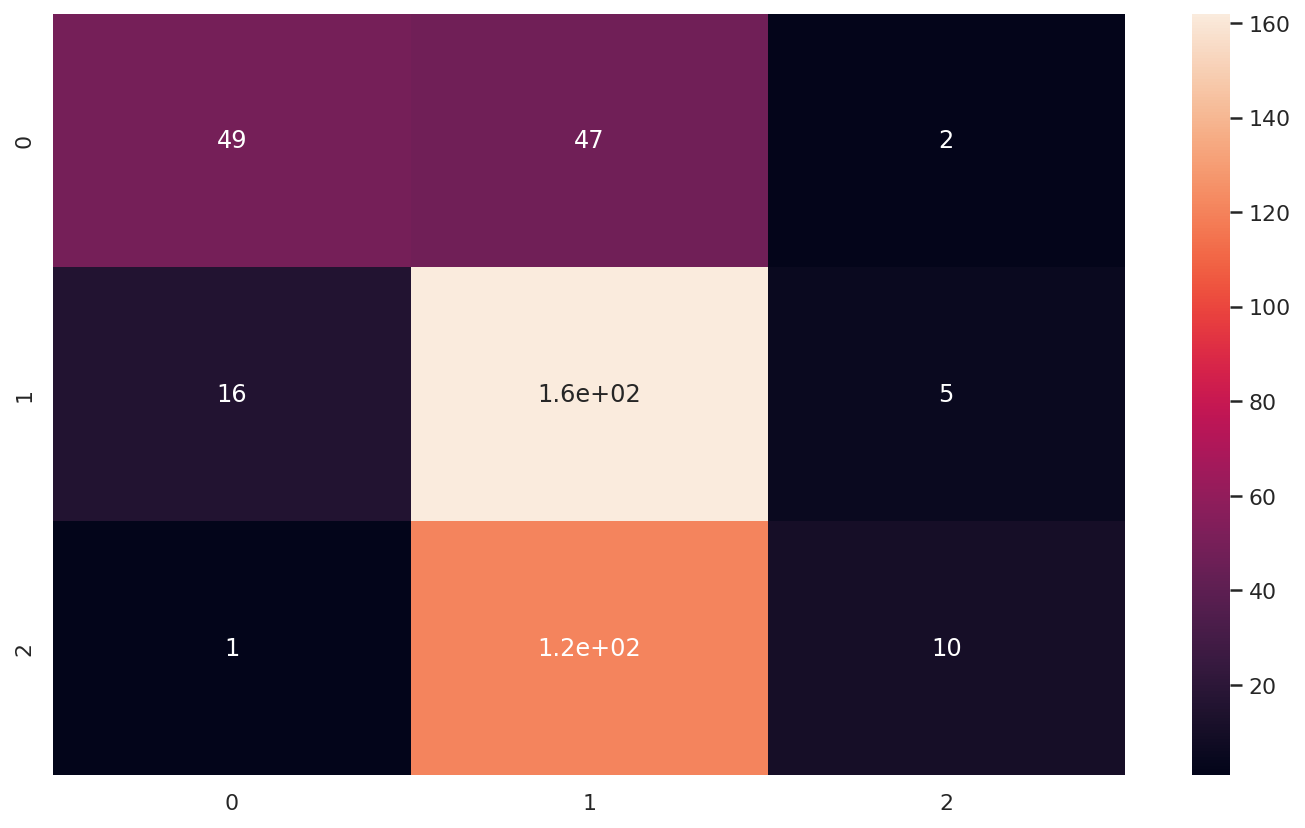

In [41]:
import seaborn as sns
sns.heatmap(confusion_matrix(df["y_true"], df["y_pred_google_binary"]), annot=True)

In [29]:
# IBM

In [30]:
accuracy_score(df["y_true"], df["y_pred_ibm_binary"])

0.5447941888619855

In [31]:
recall_score(df["y_true"], df["y_pred_ibm_binary"], average='weighted')

0.5447941888619855

In [32]:
f1_score(df["y_true"], df["y_pred_ibm_binary"], average='weighted')

0.49960830424203256